# Multiple Layer GRU

In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals


import tensorflow_datasets as tfds
import tensorflow as tf
print(tf.__version__)


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

1.13.1


In [3]:
# If the tf.__version__ is 1.x, please run this cell
!pip install tensorflow-gpu==2.0.0-alpha0

     |████████████████████████████████| 332.1MB 54kB/s 
     |████████████████████████████████| 61kB 24.9MB/s 
     |████████████████████████████████| 3.0MB 32.0MB/s 
     |████████████████████████████████| 419kB 36.3MB/s 


In [1]:
import tensorflow_datasets as tfds
import tensorflow as tf
print(tf.__version__)

2.0.0-alpha0


In [2]:
# Get the data
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']


W0504 14:00:58.748292 140513190082432 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow_datasets/core/file_format_adapter.py:247: tf_record_iterator (from tensorflow.python.lib.io.tf_record) is deprecated and will be removed in a future version.
Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/0.1.0. Subsequent calls will reuse this data.


In [0]:
tokenizer = info.features['text'].encoder

In [0]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, train_dataset.output_shapes)
test_dataset = test_dataset.padded_batch(BATCH_SIZE, test_dataset.output_shapes)

In [0]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          523840    
_________________________________________________________________
conv1d (Conv1D)              (None, None, 128)         41088     
_________________________________________________________________
global_average_pooling1d (Gl (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 573,249
Trainable params: 573,249
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [39]:
NUM_EPOCHS = 10
history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 70s 179ms/step - loss: 0.5479 - accuracy: 0.7041 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/10
391/391 [==============================] - 67s 171ms/step - loss: 0.4130 - accuracy: 0.8220 - val_loss: 0.4096 - val_accuracy: 0.8203
Epoch 3/10
391/391 [==============================] - 67s 170ms/step - loss: 0.2816 - accuracy: 0.8910 - val_loss: 0.3933 - val_accuracy: 0.8392
Epoch 4/10
391/391 [==============================] - 66s 170ms/step - loss: 0.3081 - accuracy: 0.8744 - val_loss: 0.4315 - val_accuracy: 0.8242
Epoch 5/10
391/391 [==============================] - 66s 169ms/step - loss: 0.2191 - accuracy: 0.9172 - val_loss: 0.3924 - val_accuracy: 0.8431
Epoch 6/10
391/391 [==============================] - 64s 163ms/step - loss: 0.1534 - accuracy: 0.9475 - val_loss: 0.4751 - val_accuracy: 0.8231
Epoch 7/10
391/391 [==============================] - 64s 163ms/step - loss: 0.1049 - accuracy: 0.9656 - val_loss: 0.5049 

In [0]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

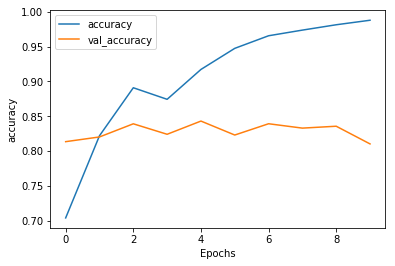

In [41]:
plot_graphs(history, 'accuracy')

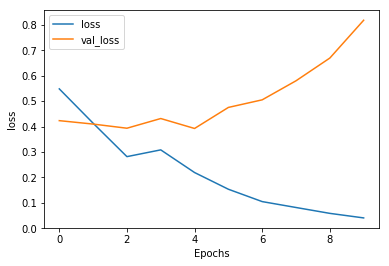

In [42]:
plot_graphs(history, 'loss')